In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [113]:
#importing the datasets and creating the full one
dataset_original_mutation = pd.read_csv('csv_data\mutation.csv')
dataset_original_mutation['Mutation'] = 1
dataset_original_no_mutation = pd.read_csv('csv_data/no_mutation.csv')
dataset_original_no_mutation['Mutation'] = 0
dataset_original = pd.concat([dataset_original_mutation, dataset_original_no_mutation]).drop(columns=['filename'])
#shuffling the dataset
dataset_original = dataset_original.sample(frac=1).reset_index(drop=True)

dataset_over700 = pd.read_csv('csv_data\OVER700_anonym.csv')
dataset_over700['Mutation'] = 0

dataset_less300 = pd.read_csv('csv_data\LESS300_anonym.csv')
dataset_less300['Mutation'] = 1

#dataset_generated = pd.read_csv('Data_Generated.csv')

dataset_original['Generated'] = 0
#dataset_generated['Generated'] = 1

#dataset = pd.concat([dataset_original, dataset_generated])

dataset = dataset_original

dataset

,diagnostics_Image-original_Mean,diagnostics_Mask-original_VoxelNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,...,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Mutation,Generated
0,864.444424,4970,0.819363,0.585682,22.561746,38.522169,51.017039,40.415636,44.047575,51.156994,...,8.026583,0.881288,1.750057e-01,0.014917,0.001337,8.163183e+05,1.723811,35.365380,1,0
1,107.383964,62686,0.836156,0.652617,30.728434,47.084933,48.042023,57.157739,58.206667,58.206667,...,6.935569,0.045895,4.216166e+04,9.295978,0.000183,6.012310e+02,0.096176,0.066930,1,0
2,1549.177880,11530,0.767956,0.665934,29.566700,44.398822,49.791797,53.841822,46.067630,58.036966,...,8.098697,0.788291,4.952612e-01,0.034210,0.000979,2.783182e+05,0.700184,18.830508,1,0
3,1899.242926,8480,0.647942,0.540146,15.560150,28.807288,27.377831,34.327977,29.142111,34.426601,...,8.452819,0.846580,2.829404e-01,0.020824,0.000749,1.294545e+06,2.521606,26.325721,1,0
4,54.767127,230129,0.964568,0.659517,31.798700,48.215122,57.169475,57.062240,52.043984,59.319302,...,8.236528,0.007331,2.872485e+06,74.255813,0.000046,2.100619e+02,0.040374,0.009342,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,842.583845,332062,0.883772,0.489802,44.243416,90.329195,104.421116,96.415633,104.586350,105.716392,...,9.043767,0.680478,1.589933e+00,0.358747,0.000031,1.451132e+06,0.787280,1.892280,0,0
85,179.871132,38197,0.902687,0.802484,34.948521,43.550405,51.770299,52.303953,49.404493,54.227449,...,7.688111,0.260073,1.001549e+03,1.047082,0.000246,9.763488e+03,0.202029,0.533062,1,0
86,167.520642,965,0.681655,0.529983,9.395797,17.728495,18.666076,20.904130,14.817411,21.835340,...,6.352078,0.256995,6.269379e+01,0.292586,0.008286,8.762992e+02,0.083226,4.514064,0,0
87,215.088238,7298,0.738843,0.662874,21.919457,33.067326,39.169904,37.393557,30.476689,40.418413,...,6.950413,0.189093,5.024502e+02,2.176333,0.000952,1.081216e+03,0.223694,0.312670,1,0


In [114]:
tmp1 = dataset_less300["diagnostics_Image-original_Mean"]
tmp2 = dataset_less300["diagnostics_Mask-original_VoxelNum"]
tmp3 = dataset_over700["diagnostics_Image-original_Mean"]
tmp4 = dataset_over700["diagnostics_Mask-original_VoxelNum"]

dataset_less300 =  dataset_less300[dataset_less300.columns.drop(list(dataset_less300.filter(regex='diagnostics')))]
dataset_over700 =  dataset_over700[dataset_over700.columns.drop(list(dataset_over700.filter(regex='diagnostics')))]

dataset_less300 = pd.concat([tmp1, tmp2, dataset_less300], axis=1)
dataset_over700 = pd.concat([tmp3, tmp4, dataset_over700], axis=1)

dataset_less300 = dataset_less300.drop(columns=['name', 'mutation'])
dataset_over700 = dataset_over700.drop(columns=['name', 'mutation'])

dataset_less300

,diagnostics_Image-original_Mean,diagnostics_Mask-original_VoxelNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Mutation
0,169.705184,73852,0.717612,0.548849,41.971863,76.472459,78.741680,84.269666,76.781656,89.713143,...,0.000914,7.895789,0.180198,1.827917e+03,3.440715,0.000129,6.810883e+03,0.174623,0.288999,1
1,359.078246,29591,0.770846,0.692873,31.863553,45.987608,50.890542,46.881485,55.735932,56.142546,...,0.000494,7.801428,0.227535,5.279190e+02,0.348695,0.000338,1.479670e+04,0.066023,1.795252,1
2,688.882668,29023,0.787329,0.674352,33.355152,49.462556,63.445867,63.002760,47.092464,64.252858,...,0.000150,7.716466,0.671881,1.276941e+00,0.145741,0.000276,1.613983e+05,0.279296,5.015907,1
3,306.035387,73752,0.780163,0.545945,42.160089,77.224082,91.551409,84.886701,93.769033,95.542935,...,0.001215,7.429713,0.233146,1.046488e+03,1.554466,0.000162,5.991790e+03,0.055833,0.386853,1
4,82.345053,49496,0.782252,0.626648,30.817489,49.178331,51.282454,53.083787,57.115475,61.796584,...,0.004338,7.212894,0.030164,1.209640e+05,13.073315,0.000169,2.929586e+02,0.037050,0.047127,1
5,1422.259224,73806,0.863224,0.828848,38.894924,46.926491,53.031373,55.648553,54.490066,60.131407,...,0.000033,8.774300,0.757933,6.799069e-01,0.038475,0.000136,2.062410e+06,0.598689,14.377900,1
6,140.537774,32297,0.938464,0.783452,36.274895,46.301383,58.512848,52.211559,54.093849,58.864929,...,0.002391,7.384856,0.140323,3.234632e+03,2.410300,0.000335,1.408954e+03,0.094337,0.225084,1
7,111.308886,16454,0.838282,0.682654,19.257183,28.209273,31.005040,30.804893,33.027569,35.682300,...,0.002181,7.216934,0.059317,6.644927e+03,2.695239,0.000563,7.171394e+02,0.084864,0.230938,1
8,287.046199,172289,0.749226,0.482044,60.130665,124.740912,107.059009,143.575426,134.765784,144.417324,...,0.000891,7.688014,0.368178,1.395135e+02,3.770712,0.000059,1.748634e+04,0.156321,0.214127,1
9,181.780853,50876,0.480202,0.417575,33.913843,81.216111,79.308277,77.112458,54.229037,94.095163,...,0.002503,7.434721,0.091949,7.521565e+03,3.663523,0.000236,1.694194e+03,0.040479,0.270885,1


In [25]:
#Temp 
#Synthetic data

#dataframe: numeric features + target (mutation status) + label (original/generated)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=2, n_clusters_per_class=1, weights=[0.5], flip_y=0, random_state=1)

#dataframe: numeric features + target (mutation status) + label (original/generated)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
y.columns = ['Mutation']

#randomly assign the label
label = pd.DataFrame(np.random.randint(0, 2, size=(1000, 1)))
label.columns = ['Generated']

dataset = pd.concat([X, y, label], axis=1)

dataset

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,Mutation,Generated
0,-2.460003,-0.023492,0.575182,-0.765576,0.668582,-0.627495,-1.467391,1.338448,0.257618,-0.123145,...,-0.978781,-0.717071,-1.054727,0.664606,-0.497256,-0.006706,1.356221,0.642099,1,0
1,0.821520,3.106749,0.594904,0.547759,0.633160,-0.689079,0.535474,-0.200461,0.253600,1.543549,...,-0.785967,1.545825,-2.957167,1.820267,0.827533,0.927234,3.765443,1.238420,1,0
2,0.532759,-0.218921,0.554458,-0.376086,0.752270,-0.123396,-1.043610,0.018317,0.064656,2.424977,...,2.843939,2.377349,1.478149,1.446095,0.260800,-0.776604,0.141839,1.203994,0,0
3,-0.370479,0.705424,0.644804,0.338105,0.188341,1.101656,-1.681562,-0.245434,-1.240607,0.723098,...,2.380823,-1.881594,-0.274730,0.236893,0.309863,-0.402114,0.408055,-0.068001,1,1
4,0.363251,-0.289749,0.044855,0.409464,-1.494788,-1.175647,-0.818663,-0.184884,0.624590,-0.234630,...,0.029545,-1.696890,1.571163,1.738774,-0.891206,0.947290,0.324031,1.168120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.335056,1.728582,-0.183231,1.171279,0.477677,-0.782453,-0.813916,-1.141681,-0.614941,-1.634000,...,1.316157,-0.313444,0.116831,-0.235234,1.071549,-0.851866,-0.289071,-1.015003,0,0
996,0.397166,0.724560,-0.665291,1.587862,-0.573736,-0.422683,1.052241,-1.379201,-0.824516,1.602985,...,0.841307,0.288741,1.252675,1.353713,-1.093790,-0.997514,0.230343,1.187176,0,1
997,0.454673,0.945619,0.184553,-0.965407,1.441606,0.675033,-0.820562,-0.994560,0.333758,-1.826789,...,-0.069371,0.840928,-1.146591,1.040118,0.458216,0.043737,1.747218,-0.868750,1,1
998,-0.762185,0.675240,0.287434,0.022452,0.063345,0.370055,0.327780,-1.395129,-0.871037,2.114537,...,-0.074949,-0.388245,0.861466,2.080712,1.236735,1.116299,1.146168,-0.997436,0,0


In [110]:
X_original = dataset[dataset['Generated'] == 0].drop(['Mutation', 'Generated'], axis=1)
y_original = dataset[dataset['Generated'] == 0]['Mutation']

X_generated = dataset[dataset['Generated'] == 1].drop(['Mutation', 'Generated'], axis=1)
y_generated = dataset[dataset['Generated'] == 1]['Mutation']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_original, y_original)

X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.4, random_state=42)

X_train = pd.concat([X_train, X_generated])
y_train = pd.concat([y_train, y_generated])

#Уберем из X_res и y_res строчки ктоторые есть в X_train и y_train
mask = X_res.isin(X_train.to_dict(orient='list')).all(axis=1)
common_rows = X_res[mask]

#Уберем из X_res и y_res строчки ктоторые есть в common_rows
mask = X_res.isin(common_rows.to_dict(orient='list')).all(axis=1)

X_res = X_res[~mask]
y_res = y_res[~mask]

#Добавим к X_train и y_train X_res и y_res
X_train = pd.concat([X_train, X_res])
y_train = pd.concat([y_train, y_res])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(130, 109) (130,)
(36, 109) (36,)


In [116]:
dataset

,diagnostics_Image-original_Mean,diagnostics_Mask-original_VoxelNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,...,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Mutation,Generated
0,864.444424,4970,0.819363,0.585682,22.561746,38.522169,51.017039,40.415636,44.047575,51.156994,...,8.026583,0.881288,1.750057e-01,0.014917,0.001337,8.163183e+05,1.723811,35.365380,1,0
1,107.383964,62686,0.836156,0.652617,30.728434,47.084933,48.042023,57.157739,58.206667,58.206667,...,6.935569,0.045895,4.216166e+04,9.295978,0.000183,6.012310e+02,0.096176,0.066930,1,0
2,1549.177880,11530,0.767956,0.665934,29.566700,44.398822,49.791797,53.841822,46.067630,58.036966,...,8.098697,0.788291,4.952612e-01,0.034210,0.000979,2.783182e+05,0.700184,18.830508,1,0
3,1899.242926,8480,0.647942,0.540146,15.560150,28.807288,27.377831,34.327977,29.142111,34.426601,...,8.452819,0.846580,2.829404e-01,0.020824,0.000749,1.294545e+06,2.521606,26.325721,1,0
4,54.767127,230129,0.964568,0.659517,31.798700,48.215122,57.169475,57.062240,52.043984,59.319302,...,8.236528,0.007331,2.872485e+06,74.255813,0.000046,2.100619e+02,0.040374,0.009342,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,842.583845,332062,0.883772,0.489802,44.243416,90.329195,104.421116,96.415633,104.586350,105.716392,...,9.043767,0.680478,1.589933e+00,0.358747,0.000031,1.451132e+06,0.787280,1.892280,0,0
85,179.871132,38197,0.902687,0.802484,34.948521,43.550405,51.770299,52.303953,49.404493,54.227449,...,7.688111,0.260073,1.001549e+03,1.047082,0.000246,9.763488e+03,0.202029,0.533062,1,0
86,167.520642,965,0.681655,0.529983,9.395797,17.728495,18.666076,20.904130,14.817411,21.835340,...,6.352078,0.256995,6.269379e+01,0.292586,0.008286,8.762992e+02,0.083226,4.514064,0,0
87,215.088238,7298,0.738843,0.662874,21.919457,33.067326,39.169904,37.393557,30.476689,40.418413,...,6.950413,0.189093,5.024502e+02,2.176333,0.000952,1.081216e+03,0.223694,0.312670,1,0


In [146]:
X = dataset.drop(['Mutation', 'Generated'], axis=1)
y = dataset['Mutation']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_original, y_original)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [147]:
#Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [148]:
#Training the Logistic Regression model on the Training set
classifier_logreg = LogisticRegression(random_state=42)

classifier_logreg.fit(X_train, y_train)

y_pred = classifier_logreg.predict(X_test)

print(classification_report(y_test, y_pred))


X_less300 = dataset_less300.drop(['Mutation'], axis=1)
y_less300 = dataset_less300['Mutation']

y_less300_pred = classifier_logreg.predict(X_less300)
print(classification_report(y_less300, y_less300_pred))

X_over700 = dataset_over700.drop(['Mutation'], axis=1)
y_over700 = dataset_over700['Mutation']

y_over700_pred = classifier_logreg.predict(X_over700)
print(classification_report(y_over700, y_over700_pred))

              precision    recall  f1-score   support

           0       0.63      0.75      0.69        16
           1       0.80      0.70      0.74        23

    accuracy                           0.72        39
   macro avg       0.72      0.72      0.71        39
weighted avg       0.73      0.72      0.72        39

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      57.0

    accuracy                           0.00      57.0
   macro avg       0.00      0.00      0.00      57.0
weighted avg       0.00      0.00      0.00      57.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0

In [120]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42)

classifier_rf.fit(X_train, y_train)

y_pred = classifier_rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.71      0.83      0.77        18

    accuracy                           0.67        27
   macro avg       0.61      0.58      0.58        27
weighted avg       0.64      0.67      0.65        27



In [121]:
from sklearn.svm import SVC

classifier_svm = SVC(random_state=42)

classifier_svm.fit(X_train, y_train)

y_pred = classifier_svm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.67      1.00      0.80        18

    accuracy                           0.67        27
   macro avg       0.33      0.50      0.40        27
weighted avg       0.44      0.67      0.53        27



c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [122]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_gb = GradientBoostingClassifier(random_state=42)

classifier_gb.fit(X_train, y_train)

y_pred = classifier_gb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.71      0.83      0.77        18

    accuracy                           0.67        27
   macro avg       0.61      0.58      0.58        27
weighted avg       0.64      0.67      0.65        27



In [123]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class EnsembleClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self

    def predict(self, X):
        predictions = np.asarray([model.predict(X) for model in self.models])
        majority_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)
        return majority_vote

    def predict_proba(self, X):
        probas = np.asarray([model.predict_proba(X) for model in self.models])
        avg_proba = np.mean(probas, axis=0)
        return avg_proba

In [125]:
ensemble = EnsembleClassifier(models=[classifier_logreg, classifier_rf, classifier_gb])

ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.40      0.22      0.29         9
           1       0.68      0.83      0.75        18

    accuracy                           0.63        27
   macro avg       0.54      0.53      0.52        27
weighted avg       0.59      0.63      0.60        27



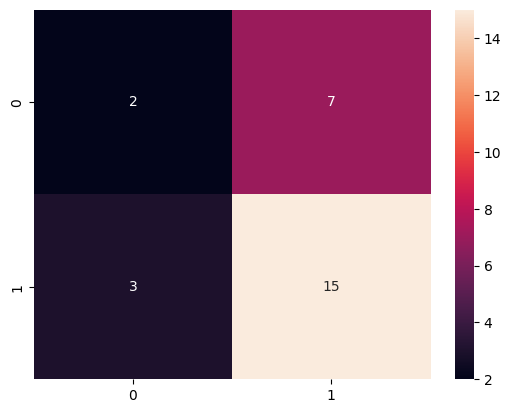

In [126]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

plt.show()

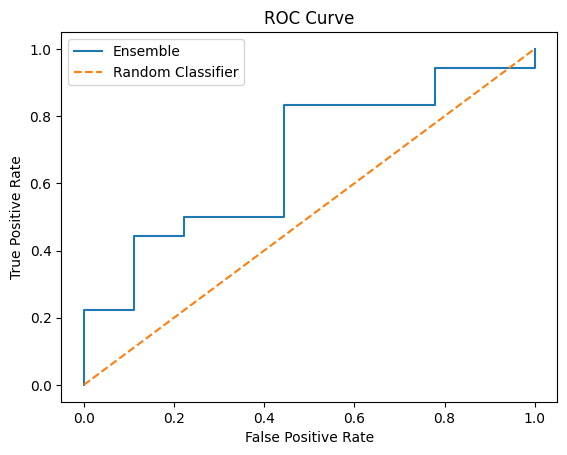

0.6728395061728396

In [128]:
#ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = ensemble.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='Ensemble')

plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend()

plt.show()

roc_auc_score(y_test, y_pred_proba)

In [132]:
X = dataset_less300.drop(['Mutation'], axis=1)
y = dataset_less300['Mutation']

y_pred = ensemble.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      57.0

    accuracy                           0.00      57.0
   macro avg       0.00      0.00      0.00      57.0
weighted avg       0.00      0.00      0.00      57.0



c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

In [131]:
X = dataset_over700.drop(['Mutation'], axis=1)
y = dataset_over700['Mutation']

y_pred = ensemble.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\GitHub\yan_studcamp_mathML\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
